# Data Exploration

In this notebook describe your data exploration steps.

## Load data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

name_db1="Zaehlstelle_Herose_2020_stuendlich_Wetter"
name_db2="Unfallatlas_Konstanz_Gesamt_2020"

df1 = pd.read_sql_table(name_db1, 'sqlite:///data.sqlite')
df2 = pd.read_sql_table(name_db2, 'sqlite:///data.sqlite')

## View of the databases

In [2]:
df1.head()

,Zeit,Fahrradbruecke,Fahrradbruecke stadteinwaerts,Fahrradbruecke stadtauswaerts,Symbol Wetter,Temperatur (°C),Gefuehlte Temperatur (°C),Regen (mm),Monat,Wochentag,Stunde,Key
0,2020-01-01 00:00:00,104.0,31.0,73.0,Leicht bewoelkt,1.0,-1.0,0.0,1,4,0,1-4-0
1,2020-01-01 01:00:00,128.0,47.0,81.0,Leicht bewoelkt,0.0,-1.0,0.0,1,4,1,1-4-1
2,2020-01-01 02:00:00,178.0,77.0,101.0,Sonnig,0.0,-2.0,0.0,1,4,2,1-4-2
3,2020-01-01 03:00:00,113.0,56.0,57.0,Sonnig,0.0,-2.0,0.0,1,4,3,1-4-3
4,2020-01-01 04:00:00,76.0,36.0,40.0,Sonnig,0.0,-2.0,0.0,1,4,4,1-4-4


In [3]:
df2.head()

,UnfallID,UJAHR,UMONAT,Jahr-Monat,UWOCHENTAG,USTUNDE,UKATEGORIE,UART,UTYP1,ULICHTVERH,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,Key
0,"8,20E+18",2020,1,2020-01-01,6,14,2,9,1,0,...,1,0,0,0,0,"510512,2678","5287973,343","9,140234078","47,74504639",1-6-14
1,"8,20E+18",2020,1,2020-01-01,6,12,3,5,3,0,...,1,0,0,0,0,"512502,3037","5279837,487","9,166547759","47,67180763",1-6-12
2,"8,20E+18",2020,1,2020-01-01,5,15,3,0,7,0,...,0,0,0,0,1,"513454,3717","5279340,436","9,179215232","47,66731622",1-5-15
3,"8,20E+18",2020,1,2020-01-01,5,10,3,5,2,0,...,1,0,0,0,0,"513794,563","5280015,59","9,183767956","47,67338386",1-5-10
4,"8,20E+18",2020,1,2020-01-01,4,19,3,5,2,2,...,1,0,1,0,0,"511459,472","5280191,795","9,152665167","47,6750149",1-4-19


## Datatypes of the columns

In [4]:
df1.dtypes

Zeit                             datetime64[ns]
Fahrradbruecke                          float64
Fahrradbruecke stadteinwaerts           float64
Fahrradbruecke stadtauswaerts           float64
Symbol Wetter                            object
Temperatur (°C)                         float64
Gefuehlte Temperatur (°C)               float64
Regen (mm)                              float64
Monat                                     int64
Wochentag                                 int64
Stunde                                    int64
Key                                      object
dtype: object

In [5]:
df2.dtypes

UnfallID               object
UJAHR                   int64
UMONAT                  int64
Jahr-Monat     datetime64[ns]
UWOCHENTAG              int64
USTUNDE                 int64
UKATEGORIE              int64
UART                    int64
UTYP1                   int64
ULICHTVERH              int64
STRZUSTAND              int64
IstRad                  int64
IstPKW                  int64
IstFuss                 int64
IstKrad                 int64
IstGkfz                 int64
IstSonstige             int64
LINREFX                object
LINREFY                object
XGCSWGS84              object
YGCSWGS84              object
Key                    object
dtype: object

## Summary statistics of the columns

In [6]:

df1.describe()


,Fahrradbruecke,Fahrradbruecke stadteinwaerts,Fahrradbruecke stadtauswaerts,Temperatur (°C),Gefuehlte Temperatur (°C),Regen (mm),Monat,Wochentag,Stunde
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8785.000000,8785.000000,8785.000000
mean,336.779599,165.292008,171.487591,10.222108,9.559995,1.533698,6.513034,4.002960,11.498805
std,310.429689,155.277798,161.073259,7.243709,8.148027,4.386720,3.451735,1.995325,6.923126
min,0.000000,0.000000,0.000000,-6.000000,-9.000000,0.000000,1.000000,1.000000,0.000000
25%,53.000000,25.000000,28.000000,4.000000,3.000000,0.000000,4.000000,2.000000,5.000000
50%,250.000000,119.000000,129.000000,10.000000,9.000000,0.000000,7.000000,4.000000,11.000000
75%,559.000000,275.000000,278.000000,16.000000,16.000000,1.000000,10.000000,6.000000,17.000000
max,1500.000000,808.000000,876.000000,32.000000,34.000000,71.000000,12.000000,7.000000,23.000000


In [7]:
bike_count_weather_type=df1.groupby("Symbol Wetter").mean()

max_weather_type=bike_count_weather_type.loc[bike_count_weather_type["Fahrradbruecke"]==bike_count_weather_type["Fahrradbruecke"].max()]
min_weather_type=bike_count_weather_type.loc[bike_count_weather_type["Fahrradbruecke"]==bike_count_weather_type["Fahrradbruecke"].min()]


C:\Temp\ipykernel_14108\322558228.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_count_weather_type=df1.groupby("Symbol Wetter").mean()


In [8]:
min_weather_type

,Fahrradbruecke,Fahrradbruecke stadteinwaerts,Fahrradbruecke stadtauswaerts,Temperatur (°C),Gefuehlte Temperatur (°C),Regen (mm),Monat,Wochentag,Stunde
Symbol Wetter,,,,,,,,,
Teilweise starker Regenfall,9.666667,2.666667,7.0,15.0,15.0,12.0,3.0,1.0,3.0


In [9]:
max_weather_type

,Fahrradbruecke,Fahrradbruecke stadteinwaerts,Fahrradbruecke stadtauswaerts,Temperatur (°C),Gefuehlte Temperatur (°C),Regen (mm),Monat,Wochentag,Stunde
Symbol Wetter,,,,,,,,,
Nieselregen mit Gewitter,574.25641,260.153846,314.102564,20.769231,21.641026,4.461538,8.358974,3.974359,16.307692


In [10]:
df2.describe()

,UJAHR,UMONAT,UWOCHENTAG,USTUNDE,UKATEGORIE,UART,UTYP1,ULICHTVERH,STRZUSTAND,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige
count,273.0,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2020.0,6.501832,4.139194,13.728938,2.849817,3.058608,3.241758,0.446886,0.172161,0.626374,0.509158,0.062271,0.150183,0.007326,0.076923
std,0.0,2.976778,1.883276,5.189051,0.368036,2.827818,2.250853,0.807774,0.415280,0.484655,0.500834,0.242091,0.357907,0.085435,0.266959
min,2020.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,4.000000,3.000000,11.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,7.000000,4.000000,14.000000,3.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.0,9.000000,6.000000,18.000000,3.000000,5.000000,6.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2020.0,12.000000,7.000000,23.000000,3.000000,9.000000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Temp\ipykernel_14108\1606627554.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_count_month=df1.groupby("Monat").sum()
C:\Temp\ipykernel_14108\1606627554.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_count_weekday=df1.groupby("Wochentag").mean()
C:\Temp\ipykernel_14108\1606627554.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_count_hour=df1.groupby("Stunde").mean()
No artists with label

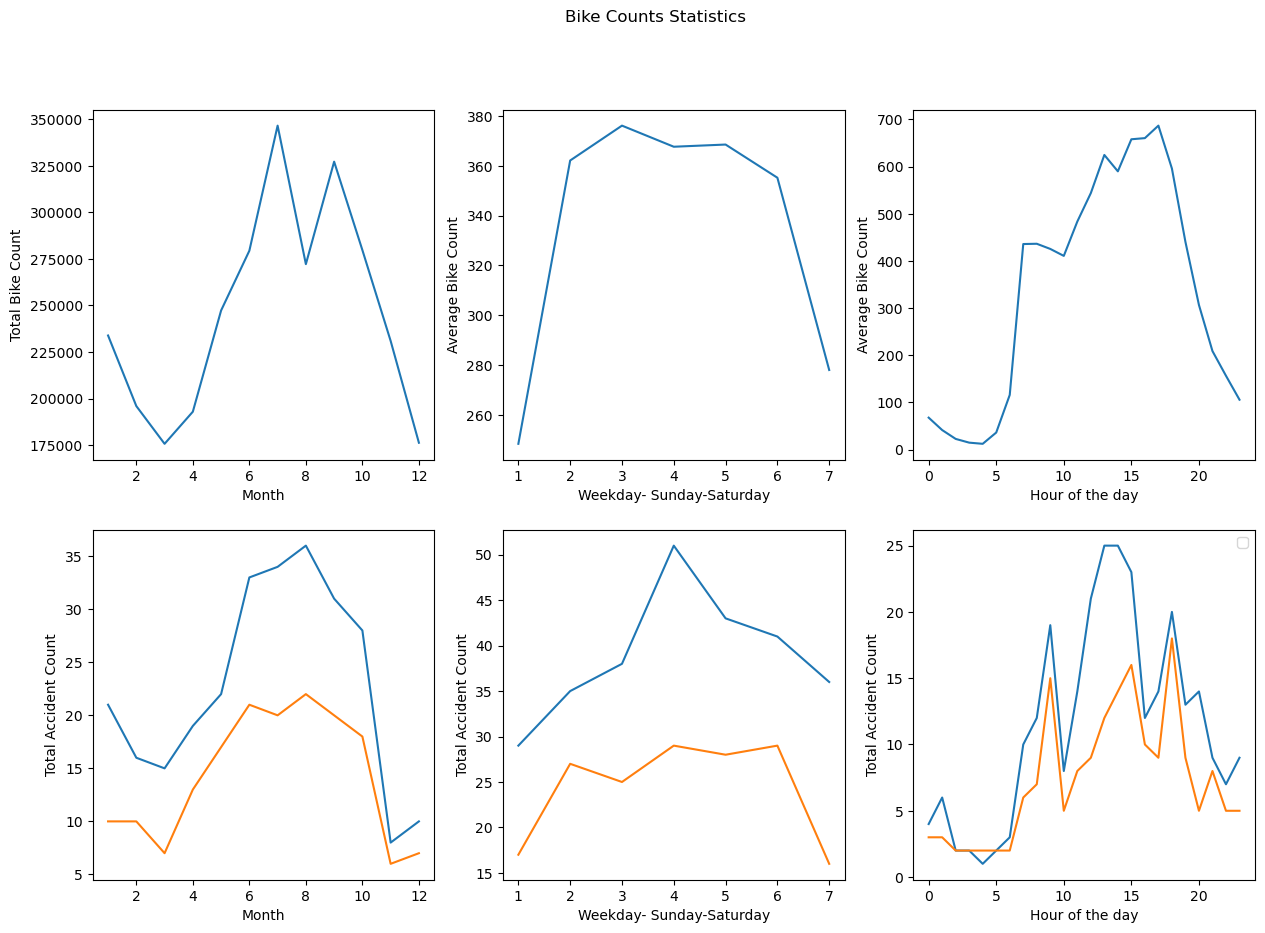

In [11]:
df2_IstRad=df2.loc[df2["IstRad"]==1]

bike_count_month=df1.groupby("Monat").sum()
bike_count_weekday=df1.groupby("Wochentag").mean()
bike_count_hour=df1.groupby("Stunde").mean()

fig, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(
                                    ncols=3,
                                    nrows=2,
                                    figsize=(15, 10))
fig.suptitle('Bike Counts Statistics')
ax1.plot(bike_count_month["Fahrradbruecke"])
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Bike Count')
ax2.plot(bike_count_weekday["Fahrradbruecke"])
ax2.set_xlabel('Weekday- Sunday-Saturday')
ax2.set_ylabel('Average Bike Count')
ax3.plot(bike_count_hour["Fahrradbruecke"])
ax3.set_xlabel('Hour of the day')
ax3.set_ylabel('Average Bike Count')

accidents_month=df2.groupby("UMONAT")["UnfallID"].count()
accidents_weekday=df2.groupby("UWOCHENTAG")["UnfallID"].count()
accidents_hour=df2.groupby("USTUNDE")["UnfallID"].count()

accidents_month_IstRad=df2_IstRad.groupby("UMONAT")["UnfallID"].count()
accidents_weekday_IstRad=df2_IstRad.groupby("UWOCHENTAG")["UnfallID"].count()
accidents_hour_IstRad=df2_IstRad.groupby("USTUNDE")["UnfallID"].count()

ax4.plot(accidents_month,label="Total Accident")
ax4.plot(accidents_month_IstRad,label="Bike Included Accident")
ax4.set_xlabel('Month')
ax4.set_ylabel('Total Accident Count')
ax5.plot(accidents_weekday)
ax5.plot(accidents_weekday_IstRad)
ax5.set_xlabel('Weekday- Sunday-Saturday')
ax5.set_ylabel('Total Accident Count')
ax6.plot(accidents_hour)
ax6.plot(accidents_hour_IstRad)
ax6.set_xlabel('Hour of the day')
ax6.set_ylabel('Total Accident Count')

plt.legend()
plt.show()

C:\Temp\ipykernel_14108\2754301523.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_key=df1.groupby("Key").mean()


<AxesSubplot: xlabel='IstRad', ylabel='Fahrradbruecke'>

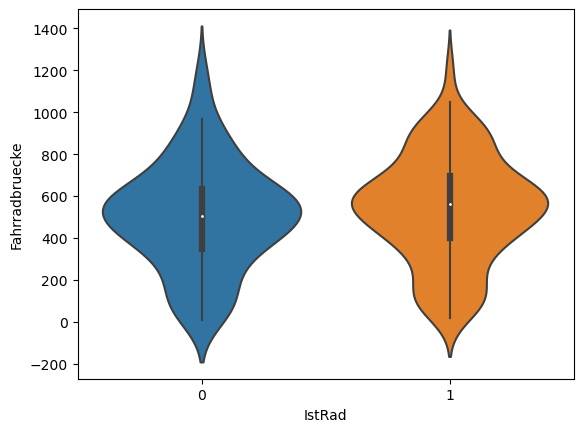

In [12]:
df1_key=df1.groupby("Key").mean()

df1_df2_merged=pd.merge(df1_key, df2, on='Key')

sns.violinplot(y=df1_df2_merged["Fahrradbruecke"],x=df1_df2_merged["IstRad"])

<AxesSubplot: xlabel='IstRad', ylabel='Fahrradbruecke'>

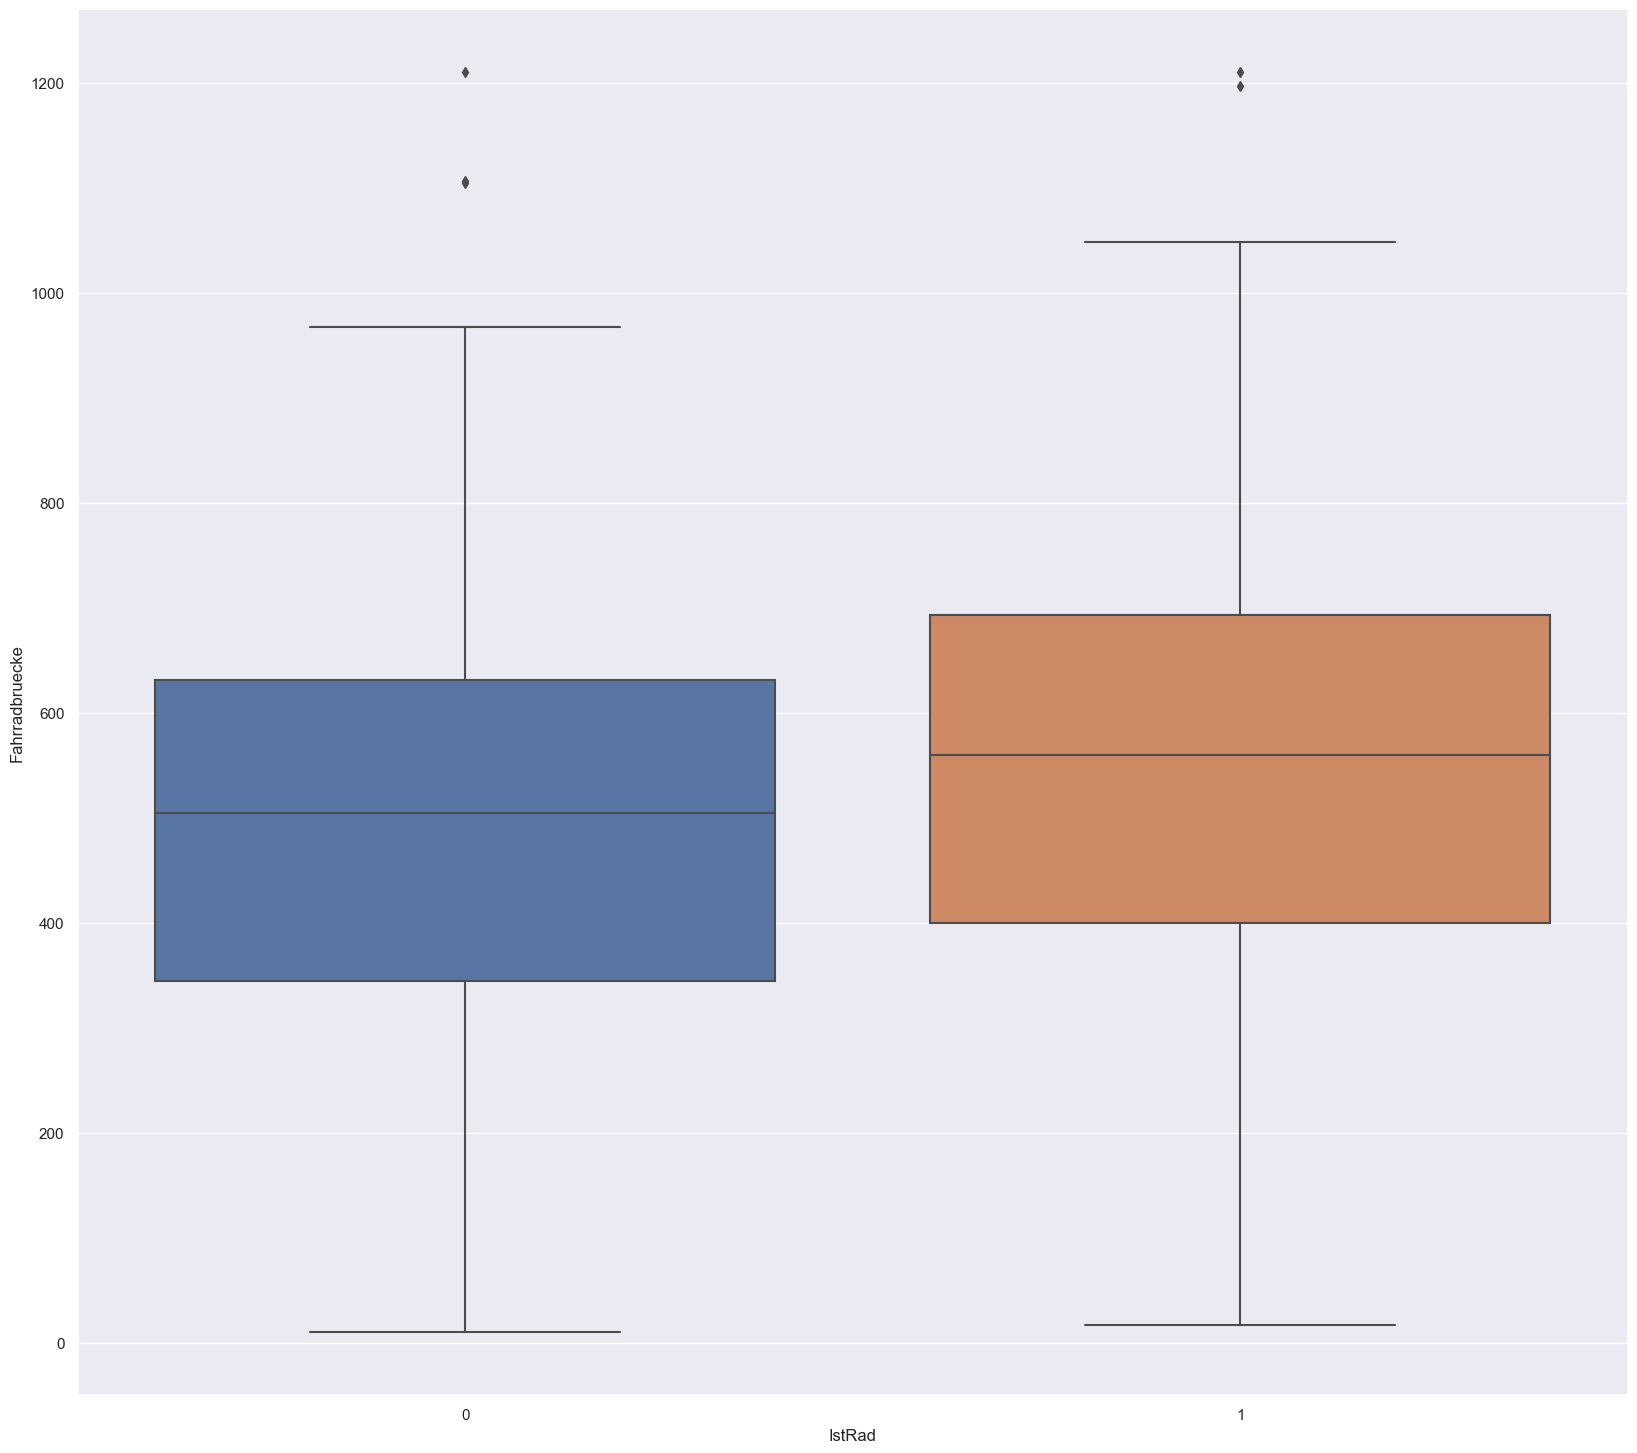

In [23]:
sns.boxplot(data=df1_df2_merged, y=df1_df2_merged["Fahrradbruecke"], x=df1_df2_merged["IstRad"])

In [14]:
df1_df2_merged

,Key,Fahrradbruecke,Fahrradbruecke stadteinwaerts,Fahrradbruecke stadtauswaerts,Temperatur (°C),Gefuehlte Temperatur (°C),Regen (mm),Monat,Wochentag,Stunde,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,1-1-3,23.25,5.75,17.50,1.00,0.00,0.25,1.0,1.0,3.0,...,0,1,0,0,0,0,"511934,3743","5280382,727","9,158997096","47,67672425"
1,1-2-7,653.25,399.50,253.75,3.50,1.75,0.00,1.0,2.0,7.0,...,1,0,0,0,0,0,"512752,2385","5278134,374","9,169827506","47,65647868"
2,1-3-12,590.75,243.00,347.75,10.00,8.75,0.75,1.0,3.0,12.0,...,0,1,0,0,0,1,"512280,0395","5280788,416","9,163613654","47,68036802"
3,1-4-19,415.40,197.40,218.00,7.20,6.20,3.00,1.0,4.0,19.0,...,0,1,0,1,0,0,"511459,472","5280191,795","9,152665167","47,6750149"
4,1-4-19,415.40,197.40,218.00,7.20,6.20,3.00,1.0,4.0,19.0,...,1,1,0,0,0,0,"513270,1223","5278674,646","9,176740778","47,66132947"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,9-6-15,787.00,354.75,432.25,15.50,15.00,0.75,9.0,6.0,15.0,...,1,0,0,0,0,0,"513347,2356","5278680,03","9,177767987","47,66137633"
269,9-6-21,194.25,82.75,111.50,11.00,10.50,0.75,9.0,6.0,21.0,...,1,1,0,0,0,0,"511461,1428","5280190,929","9,152687403","47,67500707"
270,9-6-23,107.50,42.50,65.00,9.25,8.25,1.00,9.0,6.0,23.0,...,0,1,0,0,0,0,"512540,453","5279181,875","9,167037134","47,66590791"
271,9-7-10,452.75,249.25,203.50,11.25,9.75,2.00,9.0,7.0,10.0,...,0,1,0,1,0,0,"512368,0218","5280175,525","9,164768522","47,67485176"


In [15]:
# Filtering accidents data by IstRad column. IstRad column refers the accidents if any bike has included.

df2_IstRad=df2.loc[df2["IstRad"]==1]

df2_IstRad["UWOCHENTAG"].median()

4.0

In [16]:
df2_IstRad.describe()

,UJAHR,UMONAT,UWOCHENTAG,USTUNDE,UKATEGORIE,UART,UTYP1,ULICHTVERH,STRZUSTAND,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige
count,171.0,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.0,171.000000,171.000000,171.000000,171.000000,171.000000
mean,2020.0,6.666667,4.023392,13.982456,2.871345,2.649123,2.982456,0.456140,0.169591,1.0,0.339181,0.029240,0.023392,0.005848,0.029240
std,0.0,2.914467,1.837368,5.189893,0.335801,2.854251,2.242566,0.805938,0.420657,0.0,0.474822,0.168973,0.151588,0.076472,0.168973
min,2020.0,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,5.000000,2.000000,10.500000,3.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,7.000000,4.000000,14.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.0,9.000000,6.000000,18.000000,3.000000,5.000000,5.000000,1.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,2020.0,12.000000,7.000000,23.000000,3.000000,9.000000,7.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Temp\ipykernel_14108\215830613.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1_df2_merged_cor. corr ()


<AxesSubplot: >

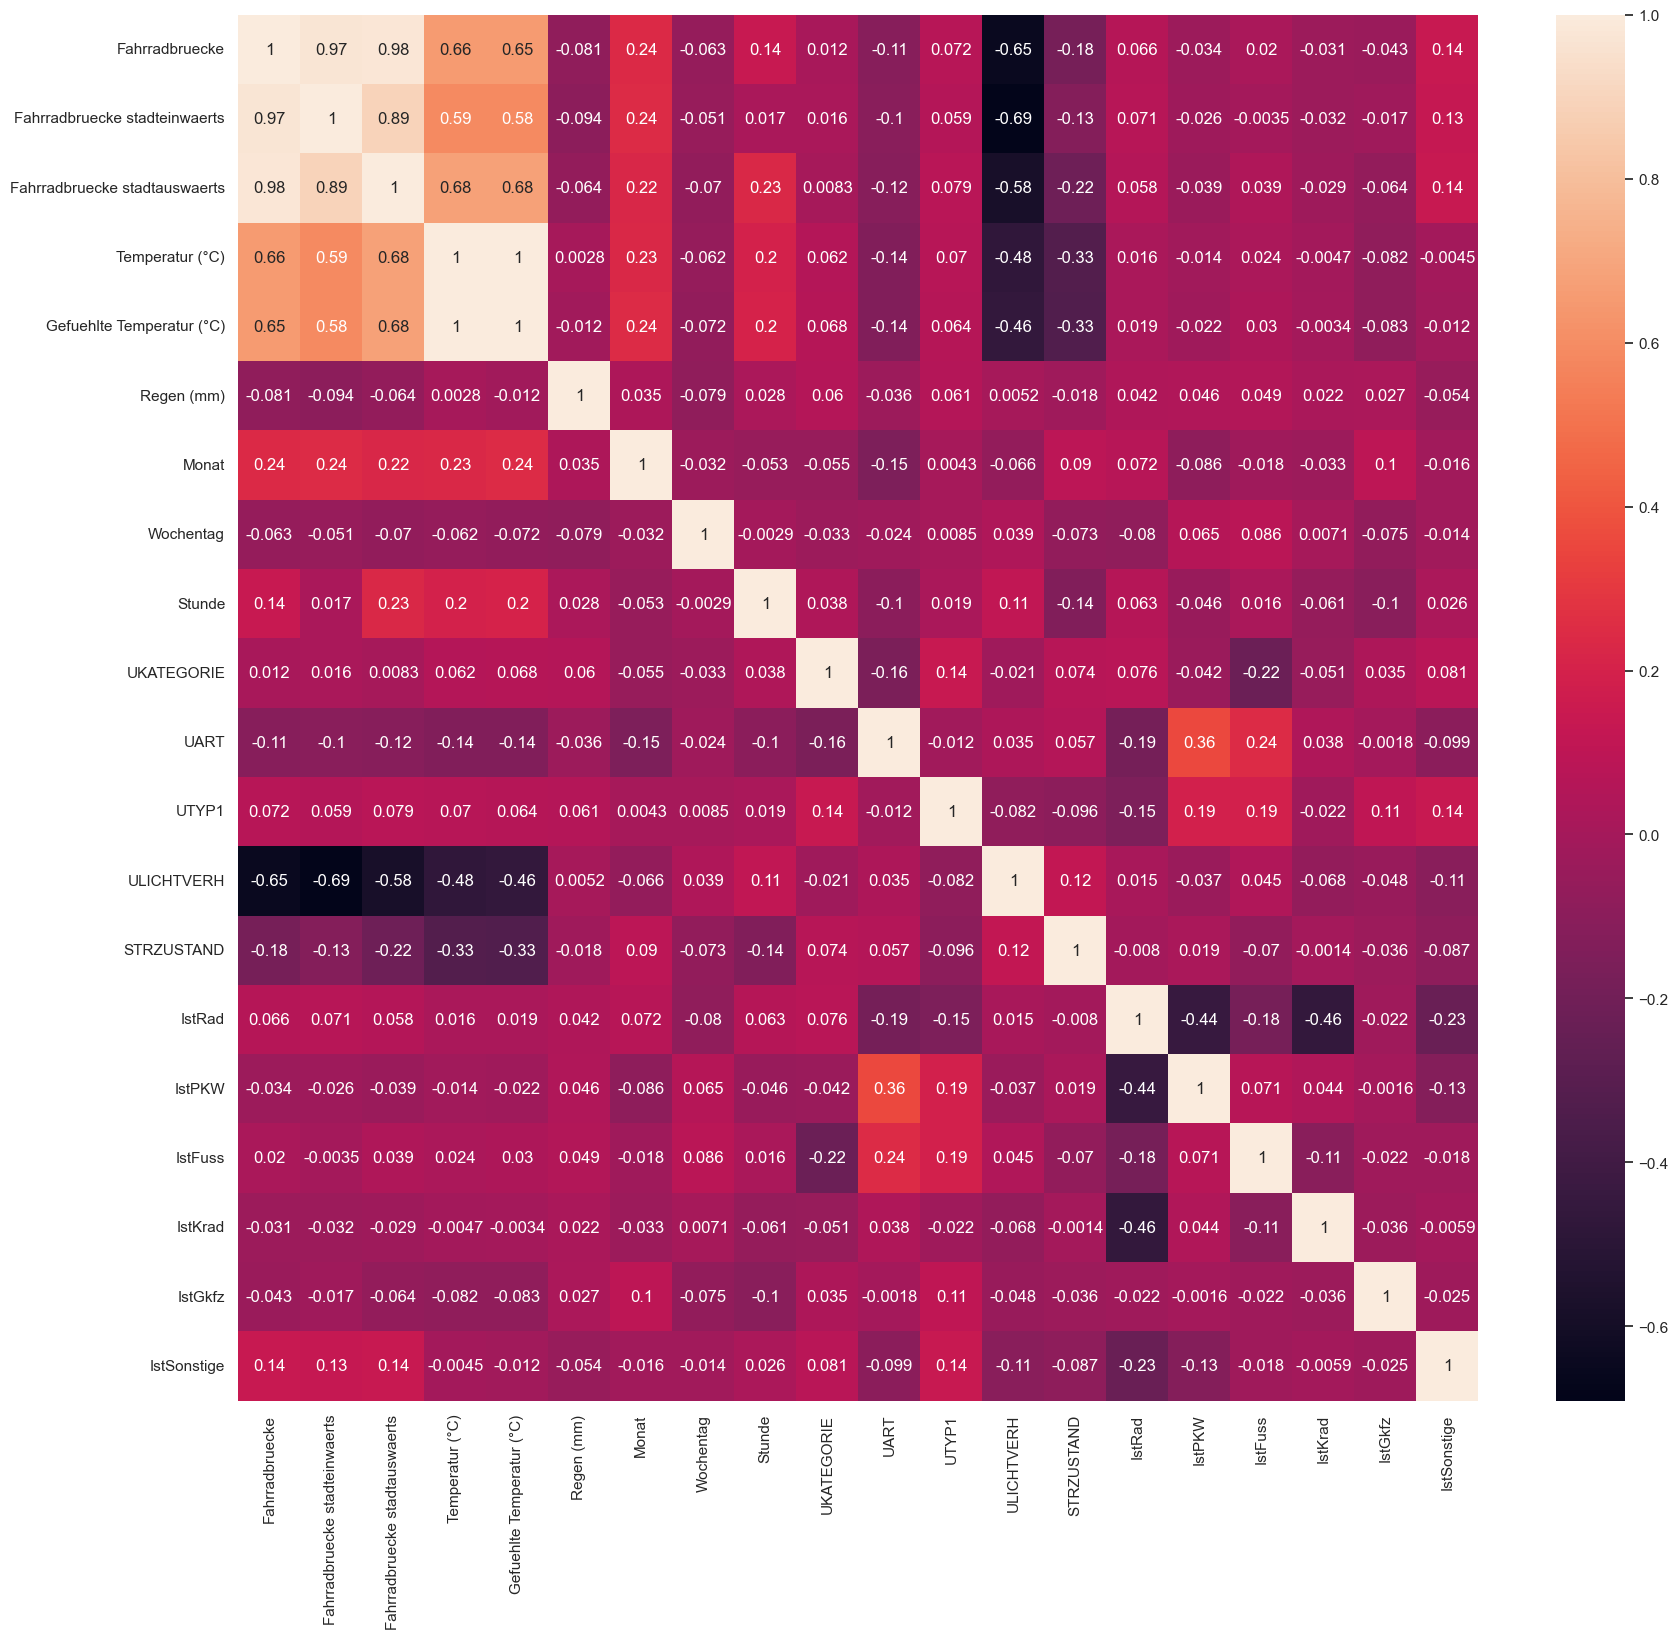

In [17]:
sns.set (rc = {'figure.figsize':(20, 18)})
df1_df2_merged_cor=df1_df2_merged.drop(['UMONAT',"UJAHR","UWOCHENTAG","USTUNDE"], axis=1)
correlation = df1_df2_merged_cor. corr ()  
sns. heatmap (correlation,annot=True)  

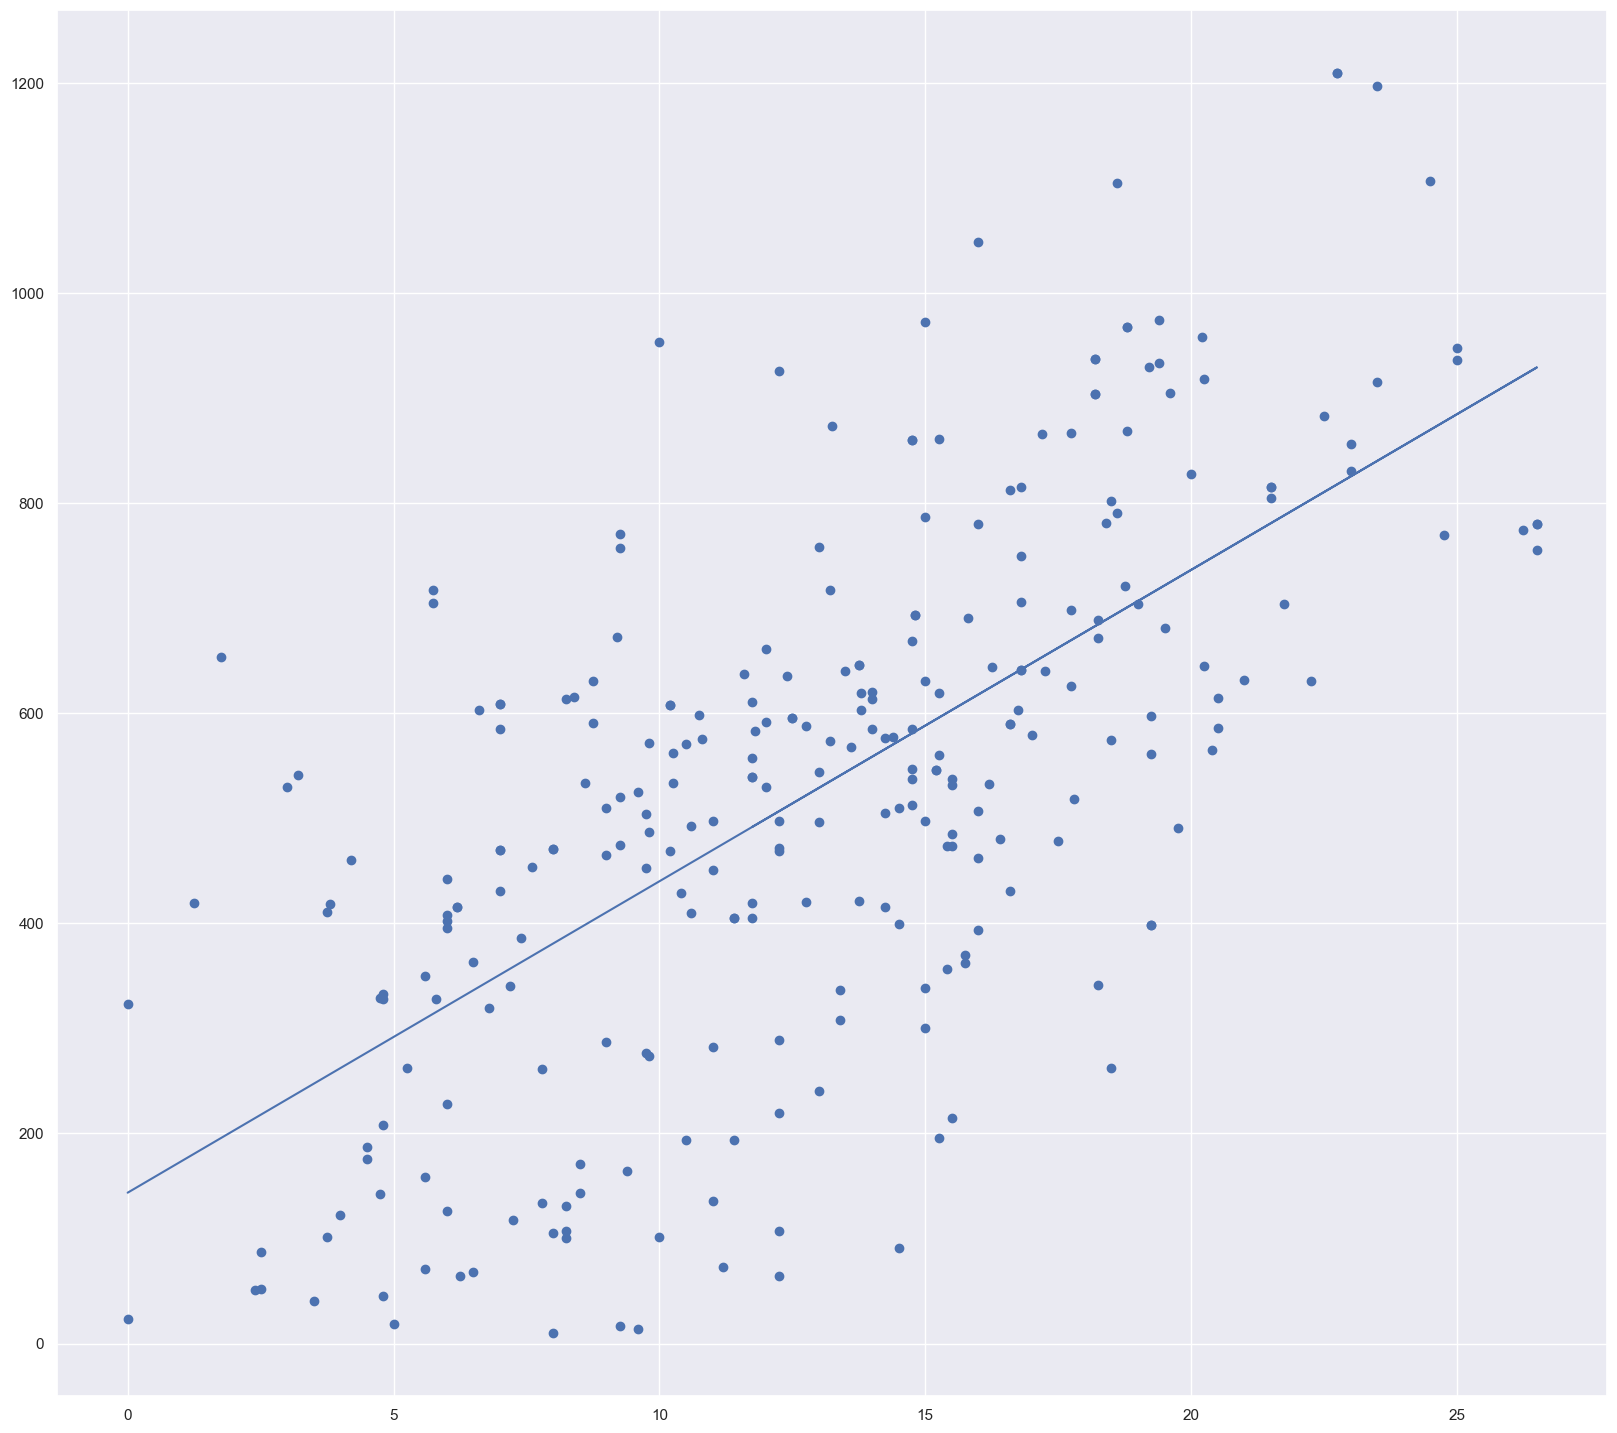

In [18]:
x=df1_df2_merged["Gefuehlte Temperatur (°C)"]
y=df1_df2_merged["Fahrradbruecke"]
plt.scatter(x,y)

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

In [19]:
## Linear Regression Model

x,y=np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)
reg = LinearRegression().fit(x,y)

reg.score(x, y)

pred_temp=22
pred_bike_count=reg.predict(np.array([[pred_temp]]))
print(pred_bike_count)


[[795.95708901]]


     Fahrradbruecke  Temperatur (°C)  Regen (mm)  Monat  Wochentag  Stunde  \
79           630.50            10.00        1.00    2.0        6.0    16.0   
267          860.25            15.25        0.75    9.0        6.0    13.0   
139          398.50            19.00        2.25    6.0        1.0    11.0   
227          539.75            12.25        0.00    8.0        4.0     8.0   
254         1104.80            18.00        4.60    9.0        4.0    17.0   
..              ...              ...         ...    ...        ...     ...   
137          585.00            14.60        1.60    5.0        7.0    13.0   
24           282.00            11.00        0.00   10.0        1.0    19.0   
115          289.00            12.25        0.00    4.0        6.0    20.0   
177          856.50            21.75        5.50    7.0        2.0    15.0   
35           592.20            13.00        0.20   10.0        5.0    11.0   

     UJAHR  UKATEGORIE  UART  UTYP1  ULICHTVERH  STRZUSTAND  Is

<AxesSubplot: >

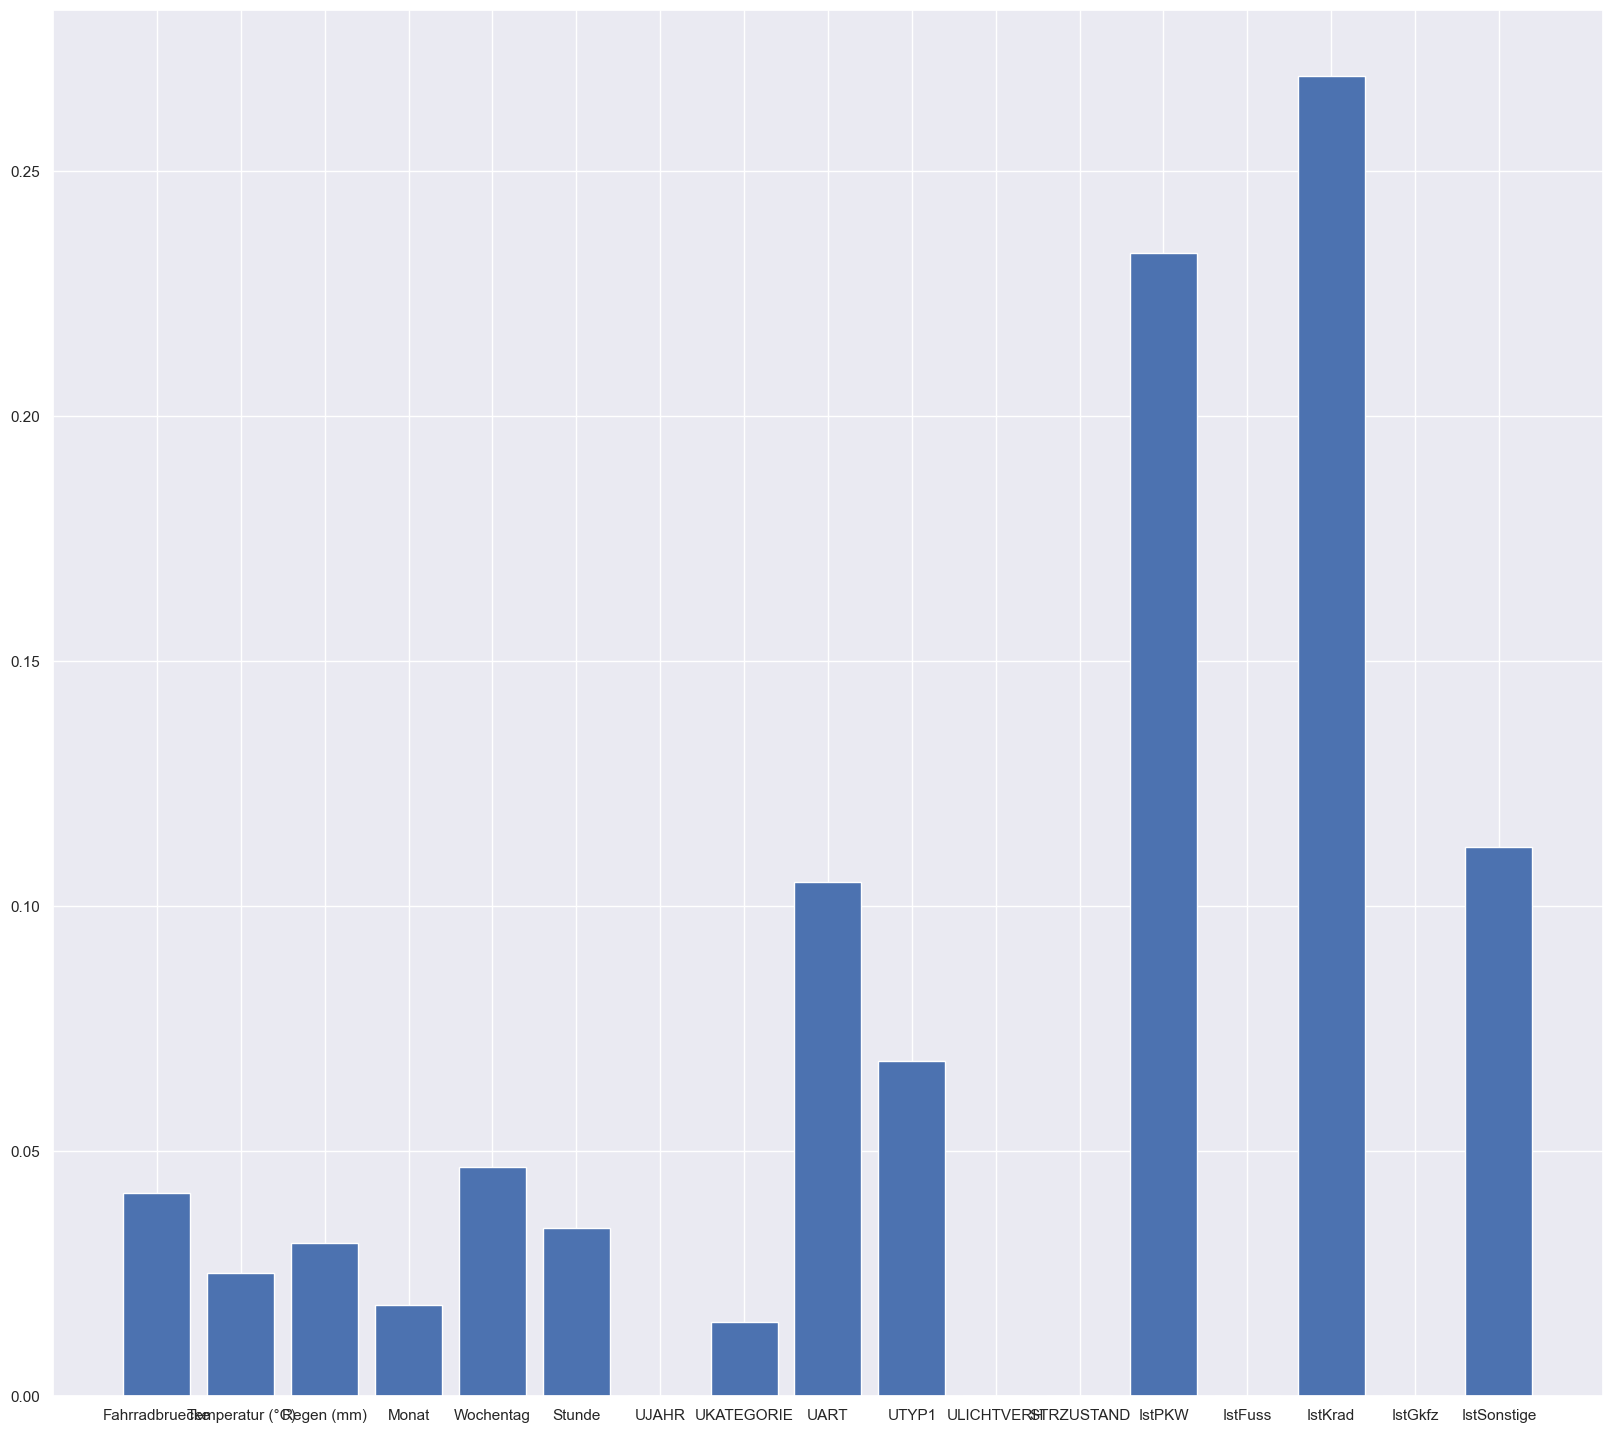

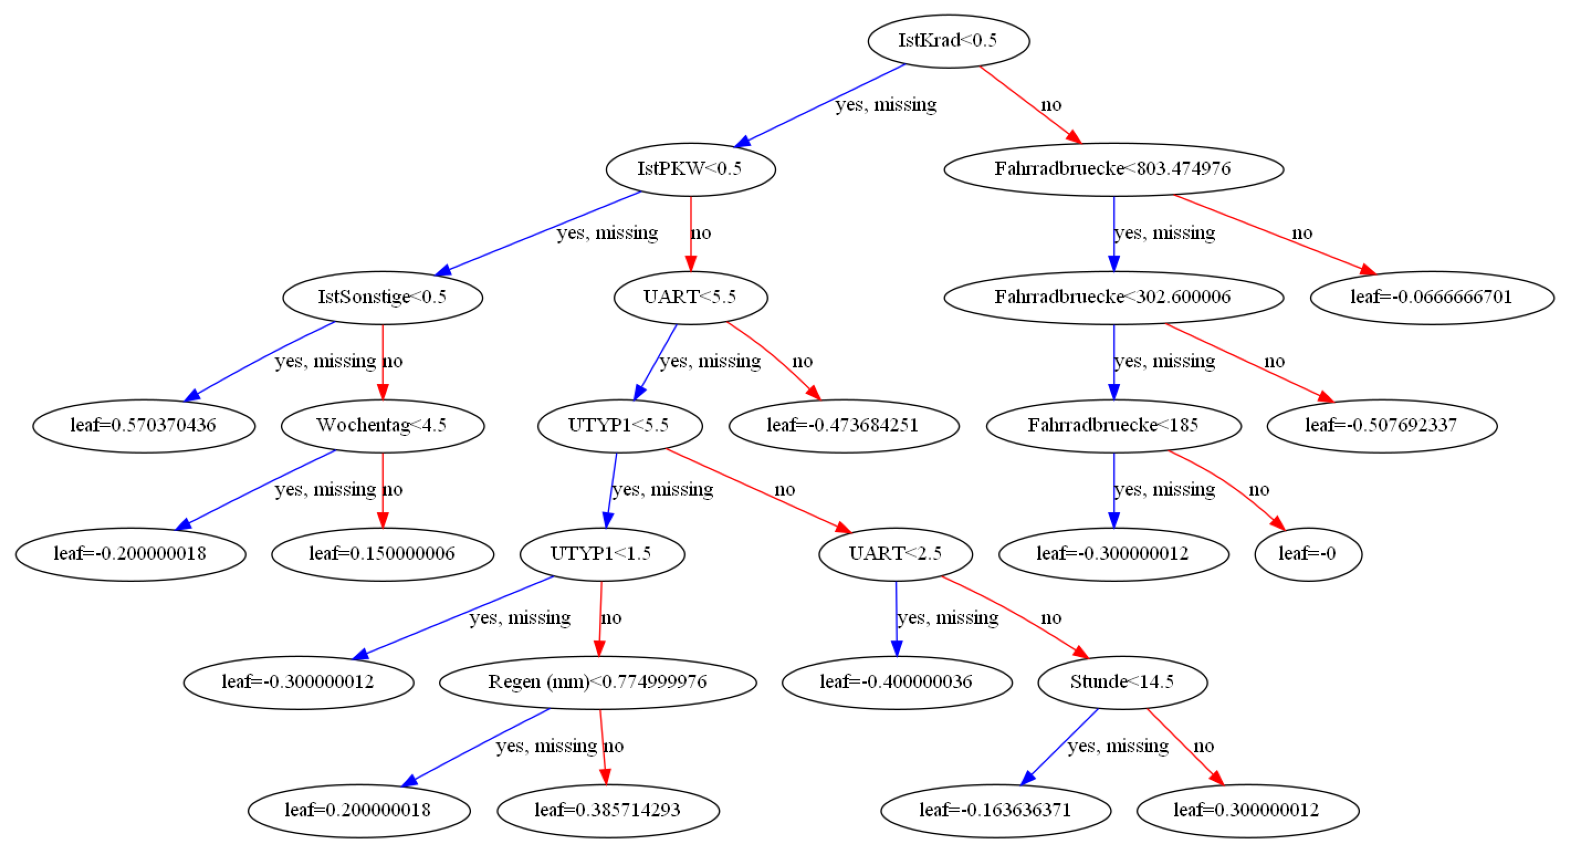

In [20]:
data=df1_df2_merged.drop(columns=["LINREFX","LINREFY","XGCSWGS84","YGCSWGS84","UnfallID","Key","Fahrradbruecke stadteinwaerts","Fahrradbruecke stadtauswaerts","Gefuehlte Temperatur (°C)","UMONAT","UWOCHENTAG","USTUNDE","Jahr-Monat"])

param="IstRad"

y=data[param]
x=data.drop(param,axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

print(x_train)

print(y_train)
model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plt.bar(x.columns, model.feature_importances_)

from xgboost import plot_tree


plot_tree(model)

### Look at the first rows

In [21]:
pred_bike_count

array([[795.95708901]])

### Data exploration
Print some basic information about the data. Your data exploration would continue here.

In [22]:
df.info()

df['Status'].unique()

NameError: name 'df' is not defined